**Name**: Romeo Jose B. Quisto

**SN**: 201907164

**Class**: THQ1

**Task**: Your task is to recreate the discussion about the information of languages based on the text. Make sure to read the discussion on our Wiki page first. You will analyze your results at the end of this exercise. **There are five steps for this exercise**. Please be guided accordingly.

* Step 1 - Importing useful tools
* Step 2 - Making the block-entropy function (5 pts.)
* Step 3a - Sanity checking (1 pts.)
* Step 3b - Fill up the table (1 pts.)
* Step 4 - Plotting stage
* Step 5 - Results and discussion (3 pts.)

Have fun doing this exercise! 💓

---

# Step 1 - Importing useful tools

Make sure to **run** this chunk of code first to initialize our setup. **DO NOT** change anything in this set of codes. We do encourage that you study the code and understand what each part does. You might use these later in your course.

In [1]:
###############################################
# PLEASE DO NOT CHANGE ANYTHING IN THIS CODE BLOCK!
###############################################

###############################################
# Import useful packages for convenience
###############################################
import math                       # For useful math functions like log of 2
import matplotlib.pyplot as plt   # For plotting later
import requests                   # For extracting data saved on git 

###############################################
# We made this for you! Use it wisely :)
###############################################

###############################################
# Calculating information. The input small x is some probability value.
# 0 <= x <= 1
# If you go beyond the input range, it will report the errors
###############################################
def info(x):
    if(x == 0):
        return 0
    if(x == 1):
        return 0
    elif(x < 0):
        print("Error! Can't have negative probabilities")
        return 
    elif(x > 1):
        print("Error! Can't have probabilities more than 1")
    else:
        return -1*(math.log(x,2))

###############################################
# Calculating entropy, the input X is a list
# For example  X = [0.2, 0.3, 0.4, 0.5]
# Returns 2.0142 bits
###############################################
def entropy(X):
    ent = 0
    for i in X:
        ent += i*info(i)
    return ent

###############################################
# Importing data
###############################################
eng_data = requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/eng_clean.txt').text
ger_data = requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/ger_clean.txt').text
fre_data = requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/fre_clean.txt').text
tag_data = requests.get('https://raw.githubusercontent.com/rgantonio/CoE161---FileDump/main/tag_clean.txt').text

---

# Step 2 - Making the block-entropy function

Code the function here. The function has two arguments: ``data`` and ``N``. ``data`` is the string of text to be processed. ``N`` is the block size to be considered. Here's a short pseudocode to guide you:

1. Initialize an empty dictionary.
2. Get the total length of the string.
3. Iterate for the entire length of the string (while taking note of ``N``).
4. Save into a temporarly block a slice of the string (while taking note of ``N``).
5. Save the block into the dictionary if it's new. Otherwise, create a new entry.
6. Repeat step 4-5 until we exhaust all iterations of the string.
7. Sum the frequency count for all cases (or combinations) in the dictionary. This sum will be used for determining the probability.
8. Generate a list of probabilities for every case (or combination). Note: Save it into a list so you can use the entropy function for convenience.
9. Calculate the entropy and divide by ``N`` to get the entropy for a single letter.
10. Return the value.

Some notes:
* You can deviate from the pseudocode. If you can think of a better algorithm or process, then go for it!
* There is a sanity checker in the next step. Use it to know if you did it correctly.
* When you save entries in the dictionary, it is best NOT to generate ALL combinations. Save only when a new pattern appears. This saves time and memory. Some computers may not be able to support ALL combinations.
* Confidence booster: You can do this in < 30 lines 🥰.
* Your result can have an error tolerance of 0.01

In [2]:
###############################################
# Working block-entropy function
###############################################
def get_block_entropy(data,N): 

  # Write your nice code in here
  placeholder = {}
  length = len(data)
  i = 0
  while i < length:
    if length-i >= N:
      blk = data[i:i+N]
      if blk in placeholder:
        placeholder[blk] += 1
      else:
        placeholder[blk] = 1
    i += N

  probs = []
  for j in placeholder:
    probs.append(placeholder[j]/sum(placeholder.values()))

  return entropy(probs)/N

  


###############################################

---

# Sandbox

Use this empty box for experimentation purposes. Whatever is in here won't be part of your grade.

In [3]:
####################################################################################
# Sandbox space
####################################################################################


sample = "the quick brown fox jumps over the lazy dog"

print(get_block_entropy(sample,2))




####################################################################################

2.19615871138938


---

# Step 3a - Sanity checking

Sanity checking stage. Make sure these pass before moving into the final plotting stage. DO NOT CHANGE ANYTHING IN HERE. (1 pts.)

In [4]:
eng_sample = get_block_entropy(eng_data,1)
ger_sample = get_block_entropy(ger_data,1)
fre_sample = get_block_entropy(fre_data,1)
tag_sample = get_block_entropy(tag_data,1)

###############################################
# Sanity checking if your block works. DO NOT CHANGE ANYTIHNG IN HERE.
###############################################

if(eng_sample >= 4.10 and eng_sample <= 4.12):
  print("Good! You may proceed.")
else:
  print("English calculation is wrong!.")

if(ger_sample >= 4.09 and ger_sample <= 4.11):
  print("Good! You may proceed.")
else:
  print("German calculation is wrong!")

if(fre_sample >= 4.00 and fre_sample <= 4.02):
  print("Good! You may proceed.")
else:
  print("French calculation is wrong!")

if(tag_sample >= 3.70 and tag_sample <= 3.72):
  print("Good! You may proceed.")
else:
  print("English calculation is wrong!")

Good! You may proceed.
Good! You may proceed.
Good! You may proceed.
Good! You may proceed.


---
# Step 3b - Fill up the table

Use the code space below to get data. We'll only record the contents of the table. In the table, round up to 4 decimal places only.

In [5]:
####################################################################################
# Sandbox space
####################################################################################

print('English')
print(get_block_entropy(eng_data,1)) #english N=1
print(get_block_entropy(eng_data,2)) #english N=2
print(get_block_entropy(eng_data,3)) #english N=3
print(get_block_entropy(eng_data,4)) #english N=4
print('\nGerman')
print(get_block_entropy(ger_data,1)) #german N=1
print(get_block_entropy(ger_data,2)) #german N=2
print(get_block_entropy(ger_data,3)) #german N=3
print(get_block_entropy(ger_data,4)) #german N=4
print('\nFrench')
print(get_block_entropy(fre_data,1)) #french N=1
print(get_block_entropy(fre_data,2)) #french N=2
print(get_block_entropy(fre_data,3)) #french N=3
print(get_block_entropy(fre_data,4)) #french N=4
print('\nTagalog')
print(get_block_entropy(tag_data,1)) #tagalog N=1
print(get_block_entropy(tag_data,2)) #tagalog N=2
print(get_block_entropy(tag_data,3)) #tagalog N=3
print(get_block_entropy(tag_data,4)) #tagalog N=4



####################################################################################

English
4.1095081590650056
3.742487279775281
3.3648612218216165
2.95015634957399

German
4.099133213688625
3.712019144538438
3.3451677424431097
2.942957201955594

French
4.00525758041807
3.6362764261430787
3.331406551735355
3.0308922767983253

Tagalog
3.706917992828308
3.2922454088253046
2.997768432514993
2.699186817125204


Table: Entropy and N-Block Data (from $N = 1$ up to $N = 4$) (1 pts.)

|Language | $N = 1$  | $N = 2$  | $N = 3$  | $N = 4$  |
|---------|----------|----------|----------|----------|
| English |  4.1095  |  3.7425  |  3.3649  |  2.9502  |
| German  |  4.0991  |  3.7120  |  3.3452  |  2.9430  |
| French  |  4.0053  |  3.6363  |  3.3314  |  3.0309  |
| Tagalog |  3.7069  |  3.2922  |  2.9978  |  2.6992  |


---

# Step 4 - Plotting stage

Run this code if you want to plot your data. 
Feel free to change the **TODO** tag. You can change the number of N-grams that you want to plot.

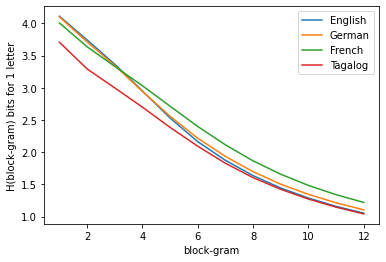

In [6]:
###############################################
# Initializing empty lists
###############################################
block_eng = []
block_ger = []
block_fre = []
block_tag = []

###############################################
# TODO: Feel free to change the number of N-grams
###############################################
points = 12

###############################################
# Retrieving data
###############################################
for i in range(points):
    
    block_eng.append(get_block_entropy(eng_data,(i+1)))
    block_ger.append(get_block_entropy(ger_data,(i+1)))
    block_fre.append(get_block_entropy(fre_data,(i+1)))
    block_tag.append(get_block_entropy(tag_data,(i+1)))

###############################################
# Create x-axis
###############################################
x = [(i + 1) for i in range(points)]

###############################################
# Plotting
###############################################
plt.plot(x,block_eng, label = "English")
plt.plot(x,block_ger, label = "German")
plt.plot(x,block_fre, label = "French")
plt.plot(x,block_tag, label = "Tagalog")
plt.xlabel("block-gram")
plt.ylabel("H(block-gram) bits for 1 letter")
plt.legend()
plt.show()

---

# Step 5 - Results and discussion

Answer the following. Please italicize all your answers just to make sure we see it immediately.

(a) When $N = 1$, what can you interpret about the entropy for each language? (1.00 pts.)

*At N=1, it can be observed that English, German, and French all have roughly the same amount of entropy. These might be because the three have the same amount of letters in their alphabet. For Tagalog, the entropy is lower than the other three. This might be due to Tagalog using less letters in word construction. Another interpretation could be that Tagalog 2-letter combinations are more predictable. For example the letter "n" is commonly followed by "g" to form the word "ng" which is prevalent in most Tagalog sentences.*

(b) As $N$ increases, $H$ decreases. What does this mean about languages? What can you interpret from this observation? (1.00 pts.)

*This might mean that as the number of letters increase per block, there is less uncertainty to what the letter might be used for. For each language, there might be common strings of letters that form to complete multiple words. As the block size increases, you just become more certain what that letter might be used for.*

(c) Do you think this experiment is sufficient to describe the information about a language? Is there something we can do to improve it? Is there something missing? (1.00 pts.)

*I don't think the experiment is sufficient to describe the information about a language since there's so much more to understand to a language and not just the amount of frequency of N-blocks of characters. It defintely provides some insight as to which letters/words are often used in specific excerpts. Depending on the topic being discussed, there may be a factor as to which a letter is more frequently used. There should be more samples of text per language. In addition to that, it is assumed that the sample string of text has meaning, but it could also have been just random jargon or repetitive words which might affect the results.*

*I also think there should be a specific measure of comparison for all languages since the frequency of letters is not sufficient to be a metric for comparison between languages since there are some languages that have a fewer letters in their alphabet. Also, if lanuage in general is being studied, other languages should be included and not just those that stemmed from the Roman alphabet. Other languages may have different letter/word structure that the frequency of a letter/character might not be a relevant metric.*

---